## Logistic Regression

*Classification
* goes to between 0 and 1 
* Sigmoid (Logistic) function takes in any value and outputs it to be between 0 and 1 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train  = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

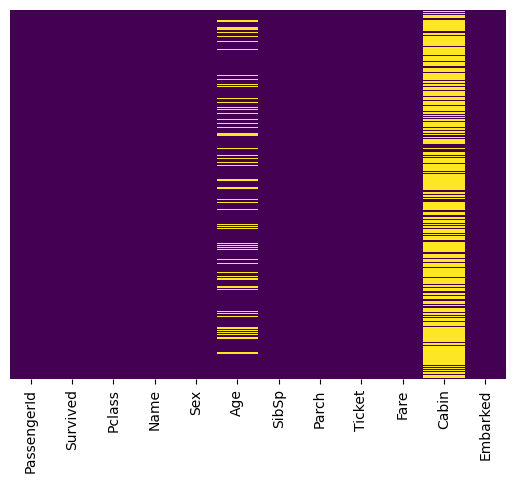

In [5]:
# missing data ???? 

sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='viridis')

# some Cabin and Age information are missing 
# how to fill in using other fields 

In [6]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

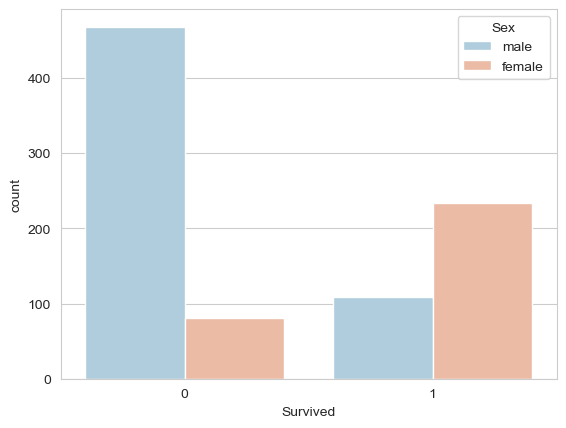

In [7]:
sns.countplot(x='Survived', data=train, hue='Sex', palette ='RdBu_r')
# more non-survivor 
# female passengers' survivor rate is higher

<Axes: xlabel='Survived', ylabel='count'>

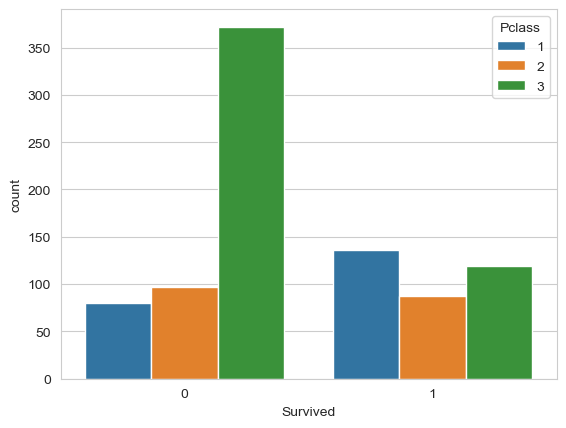

In [8]:
sns.countplot(x='Survived', data=train, hue='Pclass')

/var/folders/x3/mvvgy7h57qgbj8d85g0ql8gc0000gn/T/ipykernel_2089/2812370329.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'], kde = False, bins=30)


<Axes: xlabel='Age'>

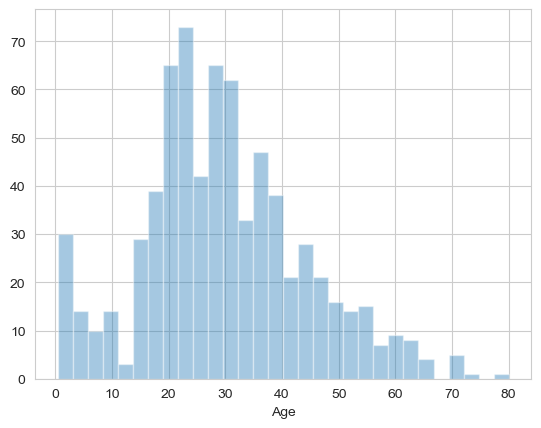

In [9]:
sns.distplot(train['Age'], kde = False, bins=30)

<Axes: ylabel='Frequency'>

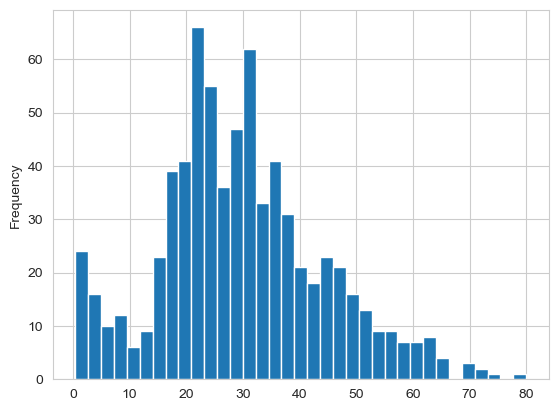

In [10]:
train['Age'].plot.hist(bins=35)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

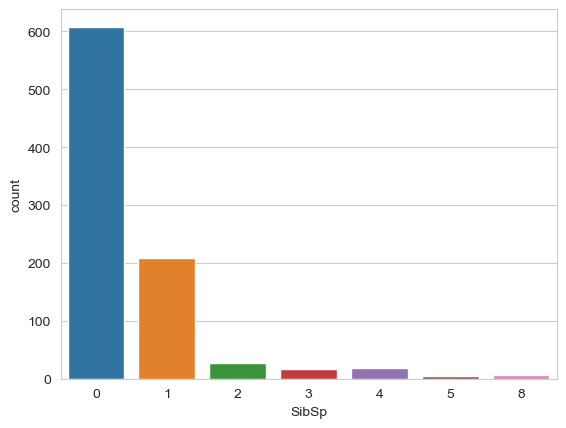

In [12]:
sns.countplot(x='SibSp', data=train)

<Axes: xlabel='Fare', ylabel='Count'>

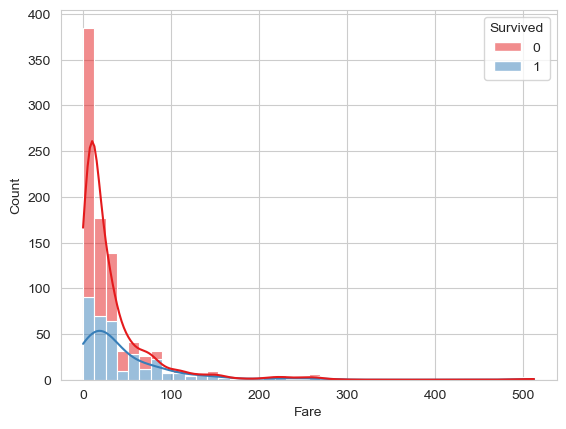

In [13]:
sns.histplot(data=train, x='Fare', bins=40, hue='Survived', multiple='stack', kde='True', common_norm=False, palette='Set1')

# data: The DataFrame containing your data (in this case, train).
# x: The column you want to create a histogram for ('Fare' in your case).
# bins: The number of bins for the histogram.
# hue: The column you want to use as a hue (in this case, 'Survived').
# kde: Set to True if you want to include a Kernel Density Estimate plot on top of the histogram.
# common_norm: Set to False if you want the histograms to be normalized independently for each hue category.
# palette: You can choose a color palette for the hues (e.g., 'Set1').

In [14]:
import cufflinks as cf
cf.go_offline()

In [15]:
train['Fare'].iplot(kind='hist', bins=50)

## Cleaning the data
** switch the data to acceptable form for ML. 

In [16]:
# plt.figsize()
# sns.boxplot(x='Pclass', y='Age', data=train)

In [17]:
def impute_age(cols): #create function
    Age = cols[0]   #from this : train[['Age', 'Pclass']].
    Pclass = cols[1]
    
    if pd.isnull(Age):
            if Pclass == 1:
                return 37
            elif Pclass == 2:
                return 29
            else:
                return 24
    else: 
        return Age 

In [18]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

<Axes: >

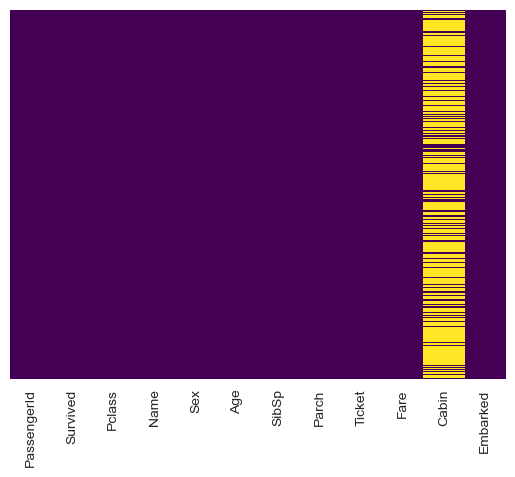

In [19]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
train.drop('Cabin', axis=1, inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

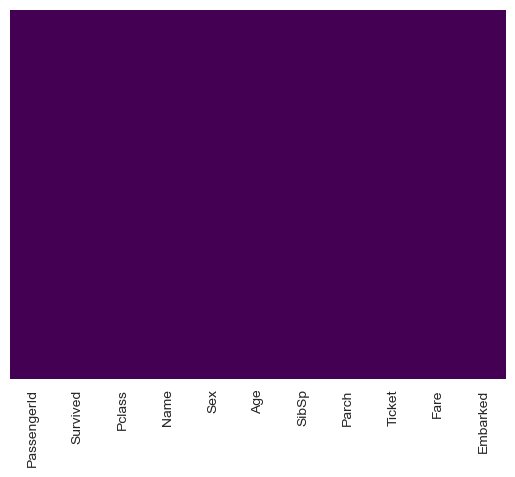

In [22]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
## categorical feature!!! 
## dummy variable format
## ML algorythm cannot understand Female/Male thing....

In [24]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [25]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [26]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [27]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [28]:
train = pd.concat([train, sex, embark], axis=1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [30]:
train.drop(['Sex', 'Embarked','Name','Ticket'], axis=1, inplace =True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [32]:
train.drop('PassengerId', axis=1, inplace=True)

In [33]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


## Model 


In [34]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [35]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=101)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression()

In [42]:
logmodel.fit(X_train, y_train)

/Users/jinnybedsole/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [43]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [49]:
y_test.head()

331    0
700    1
748    0
751    1
481    0
Name: Survived, dtype: int64

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
    confusion_matrix(y_test, predictions)

array([[133,  21],
       [ 38,  76]])